In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
from sequential_sampler import SMCSampler1

import torch
from torch.distributions import MultivariateNormal

In [65]:
N = 10000
x0 = torch.randn(N,1)
w0 = torch.ones(N)/N
T = 30
target_log_densities = [MultivariateNormal(torch.tensor([float(i)]), torch.eye(1)).log_prob for i in range(T)]
smc = SMCSampler1(target_log_densities, x0, w0)

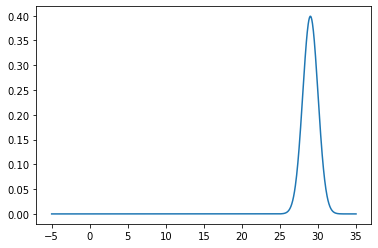

In [66]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
linspace= torch.linspace(-5, 35,1000).unsqueeze(-1)
for i in range(T):
    clear_output(wait=True)
    plt.figure()
    plt.plot(linspace, torch.exp(target_log_densities[i](linspace)))
    plt.show()

In [67]:
smc.sample()

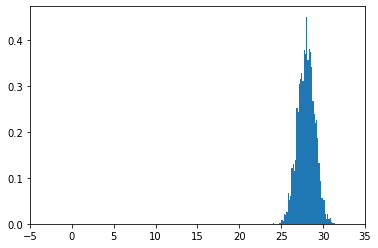

In [68]:
for particle_set in smc.particles:
    clear_output(wait=True)
    plt.figure()
    plt.hist(particle_set.detach().numpy(), bins= 50, density = True)
    plt.xlim((-5,35))
    plt.show()

In [69]:
from targets.variational_inference_target import * 

In [70]:
T = 10
target = Dimension1()

In [71]:
target_log_densities = []
for i in range(T):
    temp = lambda samples : (1-i/(T-1))*MultivariateNormal(torch.zeros(1), torch.eye(1)).log_prob(samples) + i/(T-1)*target.log_prob(samples)
    target_log_densities.append(temp)

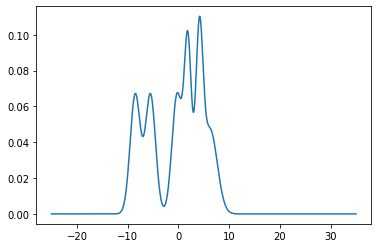

In [72]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
linspace= torch.linspace(-25, 35,1000).unsqueeze(-1)
for i in range(T):
    clear_output(wait=True)
    plt.figure()
    plt.plot(linspace, torch.exp(target_log_densities[i](linspace)))
    plt.show()

In [73]:
smc = SMCSampler1(target_log_densities, x0, w0)
smc.sample()

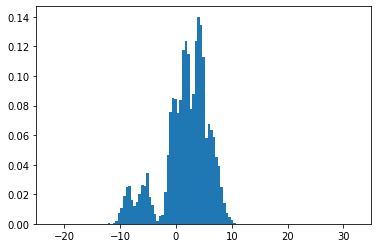

In [74]:
for particle_set in smc.particles:
    clear_output(wait=True)
    plt.figure()
    plt.hist(particle_set.detach().numpy(), bins= 50, density = True)
    plt.xlim((-25,35))
    plt.show()